In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics

from zqscore import ZQ_score

### 高维类圆环高斯分布簇

In [2]:
# 在高维空间中产生一个有核的类球状实验数据
from sklearn.datasets import make_gaussian_quantiles
# 在四维空间中以原点为中心产生高斯分布的数据，该数据从中心向外分为9层
X1, y1 = make_gaussian_quantiles(n_samples=10000, n_features=4, n_classes=9, mean=[0,0,0,0],cov=5)
print(X1)
# 只保留最内的类圆形和倒数第二外层
for i in range(len(y1)-1, -1, -1):
    if y1[i]==1 or y1[i]==2 or y1[i]==3 or y1[i]==4 or y1[i]==5 or y1[i]==6 or y1[i]==8:
        X1 = np.delete(X1, i, axis=0)
        y1 = np.delete(y1, i, axis=0)
len(y1)

[[-3.57504369  3.66225967 -1.17763124 -1.43997102]
 [ 3.45663096  0.3793756  -0.02183911  1.48518897]
 [-2.37499292  3.38289775 -5.53982392  0.35555486]
 ...
 [ 0.26320345 -5.23566683 -2.56249749 -0.16691942]
 [-2.71367275  1.01962175  2.23768167  0.86796844]
 [ 3.17471476  1.85637914 -3.17541106  4.07377088]]


2222

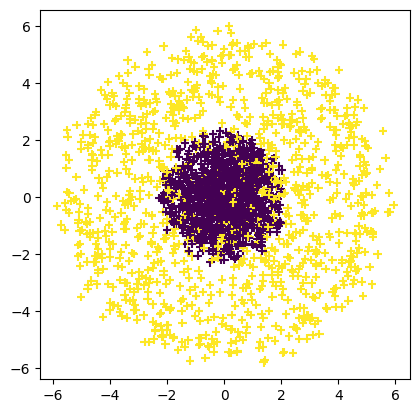

In [3]:
# 降维后，在二维平面上画出图形
pca = PCA(n_components=2).fit(X1)
X1_pca = pca.transform(X1)
plt.axes(aspect='equal')
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], marker='+', c=y1)
plt.show()

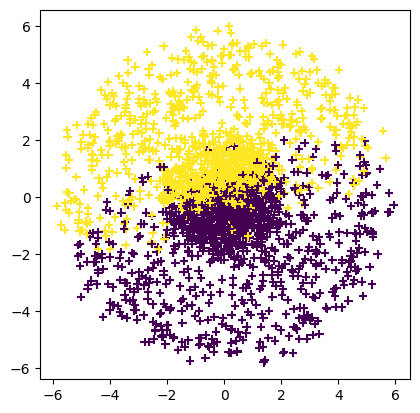

SC:	0.14018106728773772
DBI:	2.1508274375052165
CH:	382.6457061833045
ZQ:	4.728272857522398


In [4]:
clus = KMeans(n_clusters=2, random_state=0).fit(X1)
plt.axes(aspect='equal')
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], marker='+', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X1, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X1, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X1, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X1, clus.labels_)))

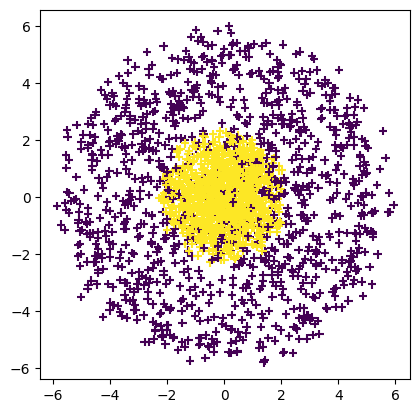

SC:	0.1674965020837475
DBI:	225.17762861371187
CH:	0.03452747268629667
ZQ:	0.2128661491743598


In [5]:
clus = DBSCAN(eps=2, min_samples=4).fit(X1)
plt.axes(aspect='equal')
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], marker='+', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X1, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X1, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X1, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X1, clus.labels_)))

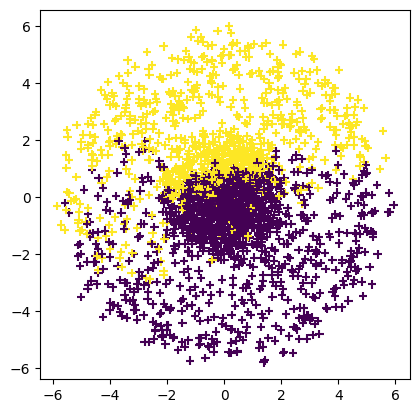

SC:	0.15370120703588322
DBI:	2.204876248162228
CH:	354.38785175081836
ZQ:	3.6862207637273645


In [6]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X1)
y1_pred = gm.predict(X1)
plt.axes(aspect='equal')
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], marker='+', c=y1_pred)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X1, y1_pred, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X1, y1_pred)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X1, y1_pred)))
print("ZQ:\t"+str(ZQ_score(X1, y1_pred)))

### 二维圆环簇

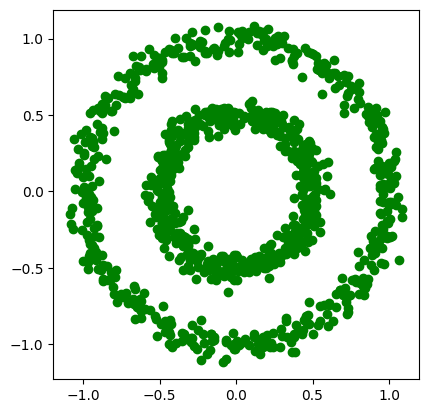

In [7]:
from sklearn.datasets import make_circles
noisy_circles = make_circles(n_samples=1000, factor=.5, noise=.05, random_state=15)
X2 = noisy_circles[0]
plt.axes(aspect='equal')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c='g')
plt.show()

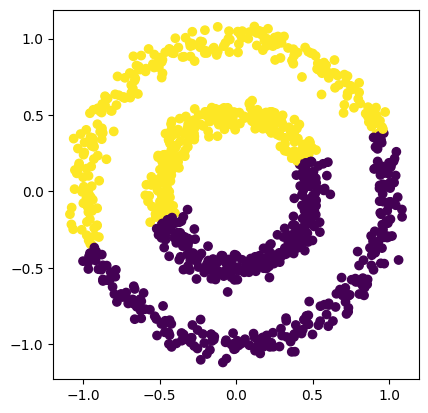

SC:	0.35189553348739855
DBI:	1.1868377015845868
CH:	569.9680558643048
ZQ:	1.2076303796478502


In [8]:
clus = KMeans(n_clusters=2, random_state=0).fit(X2)
plt.axes(aspect='equal')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X2, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X2, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X2, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X2, clus.labels_)))

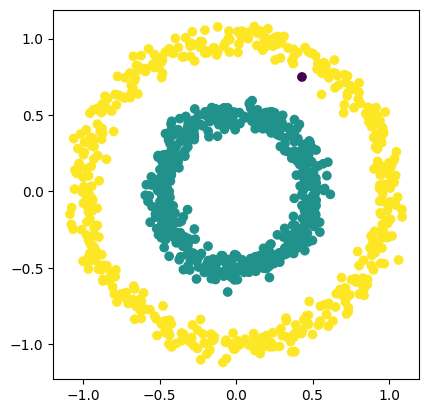

SC:	-0.06888681832165863
DBI:	150.7265870322176
CH:	0.604267157310158
ZQ:	0.07193600153357066


In [9]:
clus = DBSCAN(eps=0.1, min_samples=3).fit(X2)
plt.axes(aspect='equal')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X2, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X2, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X2, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X2, clus.labels_)))

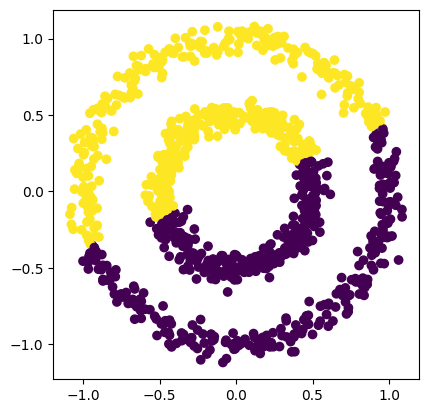

SC:	0.35189525384038034
DBI:	1.185987025456541
CH:	569.7678038939358
ZQ:	1.5358218216989408


In [10]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X2)
y2_pred = gm.predict(X2)
plt.axes(aspect='equal')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2_pred)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X2, y2_pred, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X2, y2_pred)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X2, y2_pred)))
print("ZQ:\t"+str(ZQ_score(X2, y2_pred)))

### 二维高斯分布簇

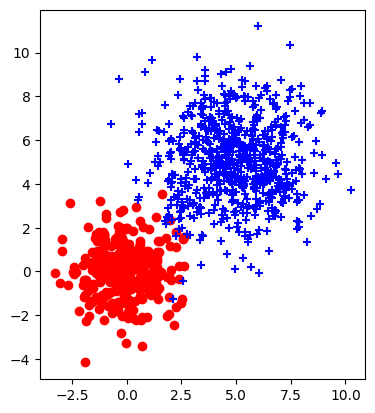

In [11]:
from sklearn.datasets import make_blobs
X3_1, y3_1 = make_blobs(n_samples=300, n_features=2, centers=[[0,0]], cluster_std=[1.2], random_state=15)
X3_2, y3_2 = make_blobs(n_samples=700, n_features=2, centers=[[5,5]], cluster_std=[1.8], random_state=15)
X3 = np.vstack((X3_1, X3_2))
plt.axes(aspect='equal')
plt.scatter(X3_1[:, 0], X3_1[:, 1], marker='o', color='r')
plt.scatter(X3_2[:, 0], X3_2[:, 1], marker='+', color='b')
plt.show()

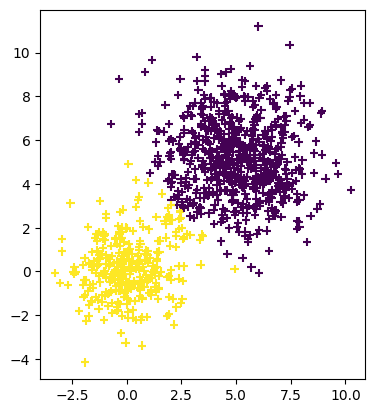

SC:	0.5955076035183081
DBI:	0.5455415671714288
CH:	2088.8677958492485
ZQ:	0.7891038471665219


In [12]:
clus = KMeans(n_clusters=2, random_state=0).fit(X3)
plt.axes(aspect='equal')
plt.scatter(X3[:, 0], X3[:, 1], marker='+', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X3, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X3, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X3, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X3, clus.labels_)))

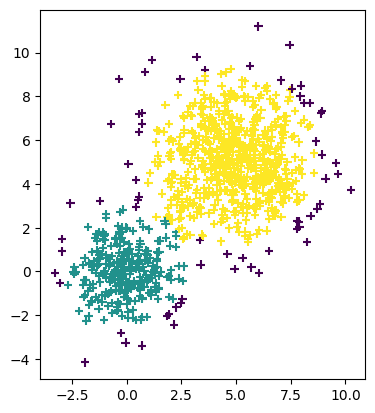

SC:	0.4971132488315835
DBI:	3.3919162730866383
CH:	800.1776282485132
ZQ:	1.2288960117259284


In [13]:
clus = DBSCAN(eps=1, min_samples=25).fit(X3)
plt.axes(aspect='equal')
plt.scatter(X3[:, 0], X3[:, 1], marker='+', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X3, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X3, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X3, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X3, clus.labels_)))

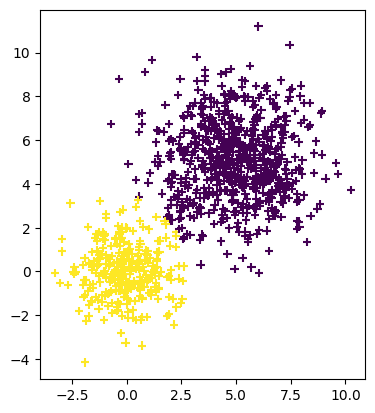

SC:	0.5960574160240512
DBI:	0.5226959093220633
CH:	2020.497457639969
ZQ:	1.0321345173106196


In [14]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X3)
y3_pred = gm.predict(X3)
plt.axes(aspect='equal')
plt.scatter(X3[:, 0], X3[:, 1], marker='+', c=y3_pred)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X3, y3_pred, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X3, y3_pred)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X3, y3_pred)))
print("ZQ:\t"+str(ZQ_score(X3, y3_pred)))

### 二维月牙分布簇

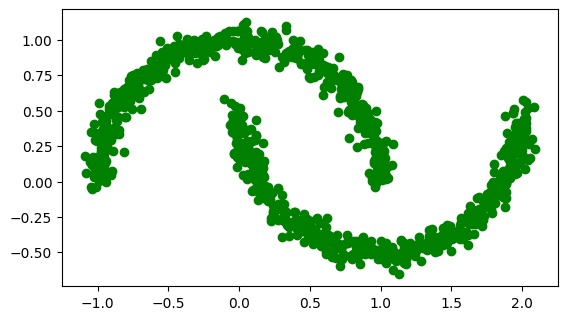

In [15]:
from sklearn.datasets import make_moons
noisy_moons = make_moons(n_samples=1000, noise=.05, random_state=15)
X4 = noisy_moons[0]
plt.axes(aspect='equal')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c='g')
plt.show()

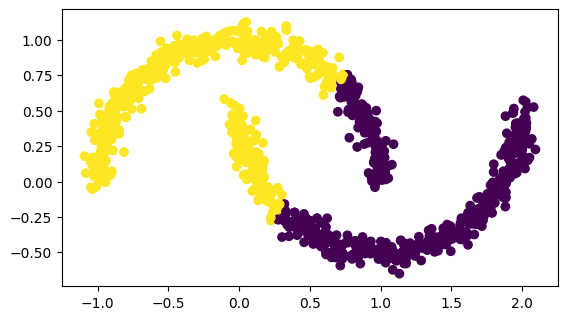

SC:	0.4897512609275416
DBI:	0.7794105338524653
CH:	1487.4454549660595
ZQ:	0.8735247408285106


In [16]:
clus = KMeans(n_clusters=2, random_state=0).fit(X4)
plt.axes(aspect='equal')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X4, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X4, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X4, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X4, clus.labels_)))

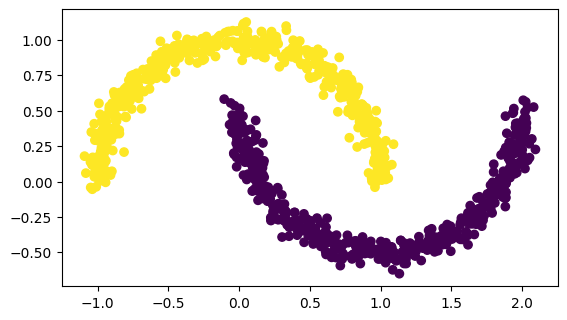

SC:	0.33345414657834466
DBI:	1.1539812259101607
CH:	663.1677674098609
ZQ:	0.06232429416022914


In [17]:
clus = DBSCAN(eps=0.1, min_samples=3).fit(X4)
plt.axes(aspect='equal')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X4, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X4, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X4, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X4, clus.labels_)))

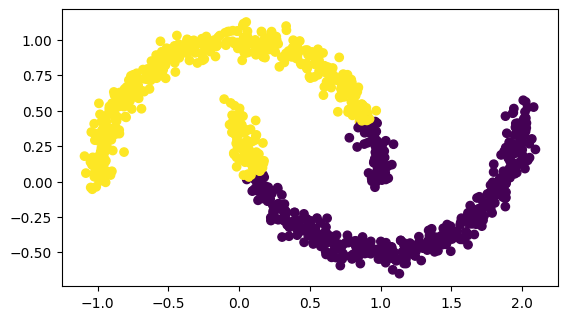

SC:	0.4680579424239563
DBI:	0.823742120847451
CH:	1282.7601223372637
ZQ:	2.5003513365473453


In [18]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X4)
y2_pred = gm.predict(X4)
plt.axes(aspect='equal')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=y2_pred)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X4, y2_pred, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X4, y2_pred)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X4, y2_pred)))
print("ZQ:\t"+str(ZQ_score(X4, y2_pred)))